In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'E:\FlipRobo Technologies\Fake news project\train_news.csv')

In [3]:
df

Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 6 columns]

In [4]:
df.shape

(20800, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [6]:
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [7]:
df1_news = df.copy()

In [8]:
df1_news

Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 6 columns]

In [9]:
df1_news['text'] = df1_news['headline']+ df1_news['news']  # combining both 'headline'and'name column to single column named 'text'

In [10]:
df1_news.shape

(20800, 7)

In [11]:
df1_news = df1_news.drop(['headline','news'],axis = 1)

In [12]:
df1_news.drop('Unnamed: 0',inplace = True, axis = 1)

In [13]:
df1_news.isnull().sum()

id               0
written_by    1957
label            0
text           597
dtype: int64

In [14]:
df1_news = df1_news.dropna()

In [15]:
df1_news.reset_index(inplace = True)

In [16]:
df1_news.shape

(18285, 5)

In [17]:
x = df1_news.drop('label',axis = 1)

In [18]:
x.head()

index     id                  written_by  \
0      0   9653  Eric Lipton and Steve Eder   
1      1  10041             David Waldstein   
2      2  19113                     Pam Key   
3      3   6868                Jess Bidgood   
4      4   7596           Finian Cunningham   

                                                text  
0  Ethics Questions Dogged Agriculture Nominee as...  
1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...  
2  Cotton to House: ’Do Not Walk the Plank and Vo...  
3  Paul LePage, Besieged Maine Governor, Sends Co...  
4  A Digital 9/11 If Trump Wins  Finian Cunningha...

In [19]:
y = df1_news['label']

In [20]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [21]:
import nltk
import re
from nltk.stem.porter import PorterStemmer   #we use porter stemmer because 
                                            #if we use lemmatization it will take a lot of time to process
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
pst = PorterStemmer()
corpus = []
for i in range(0,len(df1_news)):
    new_txt = re.sub('[^a-zA-Z]',' ',df1_news['text'][i])  #substitute all the other characters other than the alphabets from the text
    new_txt = new_txt.lower()  #lower the text
    new_txt = new_txt.split()
    
    new_txt = [pst.stem(word) for word in new_txt if not word in stopwords.words('english')] # Removing the stopwords from the text
    new_txt = ' '.join(new_txt)
    corpus.append(new_txt)
    

In [23]:
corpus[10]

'video le pen pelt egg keep smilingpopulist french presidenti candid marin le pen pelt egg arriv public appear campaign trail brittani french presidenti candid marin le pen eg campaign stop http pic twitter arriv day ahead final second round vote populist candid met protest brandish sign shout fascist one launch barrag egg mr le pen entourag caus duck cover reportedli appear rel undet unshaken howev continu smile promptli taken indoor bodyguard incid come centrist rival emmanuel macron attack mr le pen parasit liar risk throw nation civil war heat tv debat last night weekend number policemen injur violent pen protest demonstr pari hood thug film throw petrol bomb polic respond tear ga stun grenad one point burn shop trolley wheel toward offic'

In [24]:
tfidfv = TfidfVectorizer(max_features=5000, ngram_range=(1,3))  # Taking the 5000 most occuring words and combined words rage upto 3
x = tfidfv.fit_transform(corpus).toarray()

## Modelling

In [25]:
x.shape

(18285, 5000)

In [26]:
y = df1_news['label']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 0)

In [28]:
tfidfv.get_feature_names()[:20]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [29]:
df_vector = pd.DataFrame(x_train,columns = tfidfv.get_feature_names())

In [30]:
df_vector.head()

aaron  abandon  abc  abe  abedin      abil  abl  abort  abroad    absenc  \
0    0.0      0.0  0.0  0.0     0.0  0.000000  0.0    0.0     0.0  0.000000   
1    0.0      0.0  0.0  0.0     0.0  0.000000  0.0    0.0     0.0  0.000000   
2    0.0      0.0  0.0  0.0     0.0  0.030652  0.0    0.0     0.0  0.000000   
3    0.0      0.0  0.0  0.0     0.0  0.000000  0.0    0.0     0.0  0.035766   
4    0.0      0.0  0.0  0.0     0.0  0.000000  0.0    0.0     0.0  0.000000   

   ...  young  young peopl  younger  youth  youtub  zero  zika  zionist  zone  \
0  ...    0.0          0.0      0.0    0.0     0.0   0.0   0.0      0.0   0.0   
1  ...    0.0          0.0      0.0    0.0     0.0   0.0   0.0      0.0   0.0   
2  ...    0.0          0.0      0.0    0.0     0.0   0.0   0.0      0.0   0.0   
3  ...    0.0          0.0      0.0    0.0     0.0   0.0   0.0      0.0   0.0   
4  ...    0.0          0.0      0.0    0.0     0.0   0.0   0.0      0.0   0.0   

    zu  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 5000 columns]

accuracy: 0.948
Confusion Matrix


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x226f0c35308>)

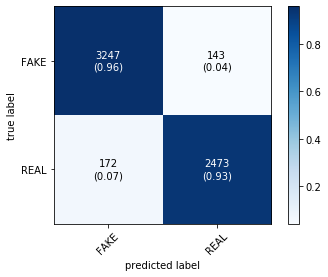

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix   # import this library to plot the confusion matrix in a pictorial representation
lr = LogisticRegression(random_state = 0)

lr.fit(x_train,y_train)
y_predlr = lr.predict(x_test)
scorelr = accuracy_score(y_test,y_predlr)
print("accuracy: %0.3f" %scorelr)
cmlr = confusion_matrix(y_test,y_predlr)
print("Confusion Matrix")
plot_confusion_matrix(conf_mat = cmlr, show_absolute = True, show_normed = True,
                     colorbar = True, class_names=['FAKE','REAL'])


accuracy: 0.954
Confusion Matrix


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x226aada98c8>)

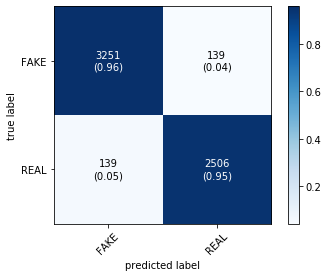

In [32]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',random_state = 0)

svc.fit(x_train,y_train)
y_predsvc = svc.predict(x_test)
scoresvc = accuracy_score(y_test,y_predsvc)
print("accuracy: %0.3f" %scoresvc)
cmsvc = confusion_matrix(y_test,y_predsvc)
print("Confusion Matrix")
plot_confusion_matrix(conf_mat = cmsvc, show_absolute = True, show_normed = True,
                     colorbar = True, class_names=['FAKE','REAL'])

accuracy :0.895
Confusion Matrix


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x226d5753a88>)

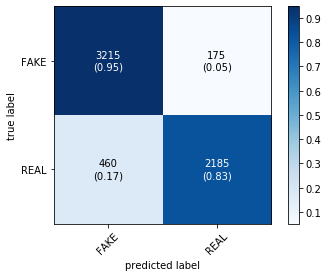

In [33]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

mnb.fit(x_train,y_train)
y_predmnb = mnb.predict(x_test)
scoremnb = accuracy_score(y_test,y_predmnb)
print("accuracy :%0.3f" %scoremnb)
cmmnb = confusion_matrix(y_test,y_predmnb)
print("Confusion Matrix")
plot_confusion_matrix(conf_mat = cmmnb, show_absolute = True, show_normed = True,
                     colorbar = True, class_names=['FAKE','REAL'])

accuracy : 0.951
Confusion Matrix


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x226ad7fccc8>)

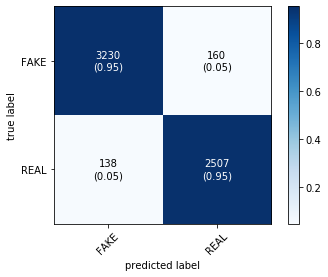

In [34]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(n_iter_no_change=50,max_iter =300)

pac.fit(x_train,y_train)
y_predpac = pac.predict(x_test)
scorepac = accuracy_score(y_test,y_predpac)
print("accuracy : %0.3f" %scorepac)
cmpac = confusion_matrix(y_test,y_predpac)
print("Confusion Matrix")
plot_confusion_matrix(conf_mat = cmpac, show_absolute = True, show_normed = True,
                     colorbar = True, class_names=['FAKE','REAL'])

PassiveAggressive classifier is a very good algorithm which works for text data

accuracy: 0.960
Confusion Matrix


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x226cfa41c88>)

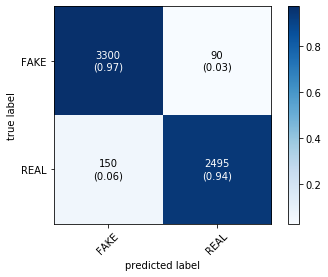

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_predrfc = rfc.predict(x_test)
scorerfc = accuracy_score(y_test,y_predrfc)
print("accuracy: %0.3f" %scorerfc)
cmrfc = confusion_matrix(y_test,y_predrfc)
print("Confusion Matrix")
plot_confusion_matrix(conf_mat = cmrfc, show_absolute = True, show_normed = True,
                     colorbar = True, class_names=['FAKE','REAL'])

In [36]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##  RandomForest with Hyperparameter

In [42]:
last_score = 0
n_estimators = [100, 300, 500, 750, 800, 1200]
for n_est in n_estimators:
    sub_rfc = RandomForestClassifier(n_estimators = n_est)
    sub_rfc.fit(x_train,y_train)
    y_predr = sub_rfc.predict(x_test)
    scorer = accuracy_score(y_test,y_predr)
    if scorer>last_score:
        rfc = sub_rfc
    print('n_estimator : {}, Score : {}'.format(n_est,scorer))  

n_estimator : 100, Score : 0.9567522783761392
n_estimator : 300, Score : 0.9597348798674399
n_estimator : 500, Score : 0.9625517812758906
n_estimator : 750, Score : 0.9622203811101906
n_estimator : 800, Score : 0.9627174813587407
n_estimator : 1200, Score : 0.9623860811930406


accuracy: 0.963
Confusion Matrix


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x226ce5c28c8>)

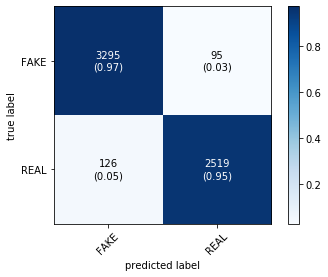

In [43]:
rfc.fit(x_train,y_train)
y_predrfc = rfc.predict(x_test)
scorerfc = accuracy_score(y_test,y_predrfc)
print("accuracy: %0.3f" %scorerfc)
cmrfc = confusion_matrix(y_test,y_predrfc)
print("Confusion Matrix")
plot_confusion_matrix(conf_mat = cmrfc, show_absolute = True, show_normed = True,
                     colorbar = True, class_names=['FAKE','REAL'])

In [44]:
print(classification_report(y_test,y_predrfc))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3390
           1       0.96      0.95      0.96      2645

    accuracy                           0.96      6035
   macro avg       0.96      0.96      0.96      6035
weighted avg       0.96      0.96      0.96      6035



## Thus the best model for this project is RandomForestClassifier with an accuracy score of 96%